# Exploratory analysis with hypothesis testing and OLS regressions

# I will deal with a dataset that contains the recordings of the tips and the bills payed by the clients of a restaurant

**1) Briefly summarize what it contains**

This dataset contains 244 observations with 7 features.
I visualized and calculated, through different pivot tables, the difference in the average of total bills payed and tips given grouping by the gender of the customers, by different days of the week and by the different meals of the day.
The results tell us that on the average male people pay higher bills and slighlty higher tips, people pay higher bills and higher tips during the weekend and pay higher bills and higher tips at dinner rather than at lunch.

In [1]:
import seaborn as sns
sns.get_dataset_names()
# df = sns.load_dataset("nameofthedataset")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")
print(df.head())
print(df.info())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


        Average Tip  Average Bill
sex                              
Male       3.089618     20.744076
Female     2.833448     18.056897


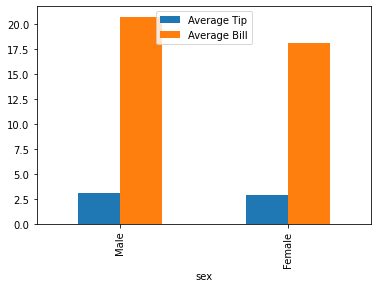

In [4]:
#Pivot Table for sex
pivot_sex = df.pivot_table(index=['sex'], values=['total_bill','tip'], aggfunc='mean')
pivot_sex.rename(columns={'tip': 'Average Tip', 'total_bill': 'Average Bill'}, inplace=True)
print(pivot_sex)
#Visualization of pivot table for sex
pivot_sex_plot = pivot_sex.plot(kind='bar')
plt.legend(loc='upper center')

      Average Tip  Average Bill
day                            
Thur     2.771452     17.682742
Fri      2.734737     17.151579
Sat      2.993103     20.441379
Sun      3.255132     21.410000


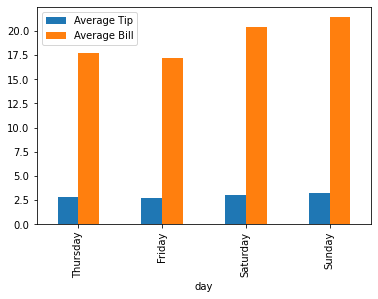

In [5]:
#Pivot Table for day
pivot_day = df.pivot_table(index=['day'], values=['total_bill','tip'], aggfunc='mean')
pivot_day.rename(columns={'tip': 'Average Tip', 'total_bill': 'Average Bill'}, inplace=True)
print(pivot_day)
#Visualization of pivot table for day
pivot_day_plot = df.pivot_table(index=['day'], values=['total_bill','tip'], aggfunc='mean').plot(kind='bar')
plt.xticks(ticks=[0,1,2,3],labels=["Thursday","Friday","Saturday","Sunday"])
plt.legend(labels=['Average Tip','Average Bill' ])
plt.show()

        Average Tip  Average Bill
sex                              
Male       3.089618     20.744076
Female     2.833448     18.056897


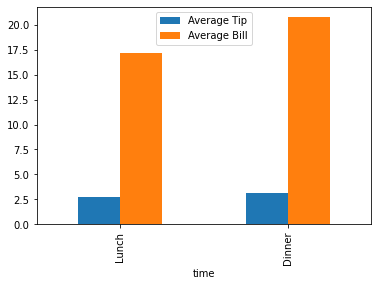

In [6]:
#Pivot Table for different meals
pivot_meals = df.pivot_table(index=['time'], values=['total_bill','tip'], aggfunc='mean')
pivot_meals.rename(columns={'tip': 'Average Tip', 'total_bill': 'Average Bill'}, inplace=True)
print(pivot_sex)
#Visualization of pivot table for different meals
pivot_meals_plot = pivot_meals.plot(kind='bar')
plt.legend(loc='upper center')

**2) Test at least 3 hypothesis. Define them previously, writing down H0 and H1, your significance level and confidence. Would be nice if you use different tests. Extra points if the tests are interesting**


I will assume that my dataset of 244 observations is already the sample of a larger population that contains the whole history of the reastaurant since the beginning.


1)In the first test I will do a t-test for indipendent samples. In particular I want to test if we can state, with a significance level of 0.01, that there is a difference in the average of the bills payed by males and the bills payed by females also in the population and not just in our sample

2)In the second test I will do a Chi-squared test of association to see if having lunch or dinner affects the bills payed by the customers. In order to do it I will create a categorical variable that states if the bill payed is above or below the average for each observation.

3)In the third test I will test the normality of the bills payed.

4)Bootstrap method to test if the mean of the tips is different from the mean of my sample

In [29]:
#1)T-Test for indipendent samples: Test of the means of the bills payed by males and females
#H0: μ(male)=μ(female)   ;   H1:  μ(male)≠μ(female)

df_male= df[df["sex"]=="Male"]
df_female= df[df["sex"]=="Female"]

from scipy.stats import ttest_ind
print(ttest_ind(df_male.total_bill, df_female.total_bill ,equal_var = False))
print("Applying a significance level of 0.01 I don't have enough evidence to reject H0 because: p-value>alpha.")
print("We can't state, with a significance level of 0.01, that there is a difference in the average of the bills payed by males and the bills payed by females also in the population and not just in our sample.")

Ttest_indResult(statistic=2.3733978410287073, pvalue=0.0185733948549217)
Applying a significance level of 0.01 I don't have enough evidence to reject H0 because: p-value>alpha.
We can't state, with a significance level of 0.01, that there is a difference in the average of the bills payed by males and the bills payed by females also in the population and not just in our sample.


In [39]:
#2)Chi-squared test of association
#H0: There are no relationships between the two categorical variables, X1=time and X2=bill_above_average
#H1: There are relationships between the two categorical variables, X1=time and X2=bill_above_average

print(df["total_bill"].mean())
df["bill_above_average"]=df.total_bill>19.785942622950824
print(df)

from scipy.stats import chi2_contingency
table = pd.crosstab(df.bill_above_average, df.time,  margins = False) 
print(table)


chi_statistic= chi2_contingency(table)[0]
print(str(chi_statistic) + "   Chi_squared statistic")
chi_pvalue= chi2_contingency(table)[1]
print(str(chi_pvalue) + "   P-value")

print("Applying a significance level of 0.01 I have enough evidence to reject H0 because: p-value<alpha.")
print("We can state, with a significance level of 0.01, that there is an association between paying a bill higher than the average and having dinner")

19.785942622950824
     total_bill   tip     sex smoker   day    time  size  bill_above_average
0         16.99  1.01  Female     No   Sun  Dinner     2               False
1         10.34  1.66    Male     No   Sun  Dinner     3               False
2         21.01  3.50    Male     No   Sun  Dinner     3                True
3         23.68  3.31    Male     No   Sun  Dinner     2                True
4         24.59  3.61  Female     No   Sun  Dinner     4                True
..          ...   ...     ...    ...   ...     ...   ...                 ...
239       29.03  5.92    Male     No   Sat  Dinner     3                True
240       27.18  2.00  Female    Yes   Sat  Dinner     2                True
241       22.67  2.00    Male    Yes   Sat  Dinner     2                True
242       17.82  1.75    Male     No   Sat  Dinner     2               False
243       18.78  3.00  Female     No  Thur  Dinner     2               False

[244 rows x 8 columns]
time                Lunch  Dinner

KstestResult(statistic=0.9989297061453211, pvalue=0.0)
Applying a significance level of 0.01 I have enough evidence to reject H0 because: p-value<alpha.
We can state, with a significance level of 0.01, that the variable total_bill is not normally distributed.


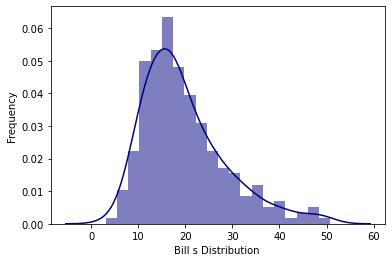

In [47]:
#3)Test Normality for the total_bill distribution
#H0: total_bill follows a normal distribution  ; H1: total_bill doesn't follow a normal distribution


import seaborn as sns
ax = sns.distplot(df.total_bill,
                  bins=20,
                  kde=True,
                  color='navy',
                  hist_kws={"linewidth": 15,'alpha':0.5})
ax.set(xlabel='Bill s Distribution ', ylabel='Frequency')


from scipy.stats import kstest
print(kstest(df.total_bill,"norm"))

print("Applying a significance level of 0.01 I have enough evidence to reject H0 because: p-value<alpha.")
print("We can state, with a significance level of 0.01, that the variable total_bill is not normally distributed.")

2.9982786885245902
99% interval confidence[2.76592643 3.22831988]
I can state with a significance of 0.01 that there is no evidence that the sample's mean is different from the population's mean


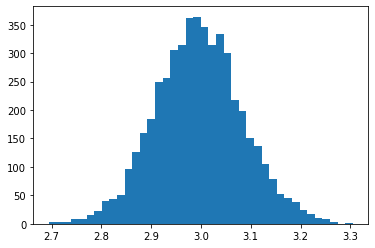

In [54]:
#4)Bootstrap method to test if the mean of the tips is different from the mean of my sample(2.9982786885245902)
#H0:  μ(tips)=2.9982786885245902   ;   H1:  μ(tips)≠2.9982786885245902


print(df.tip.mean())

#I build a for loop that append to a list the results of 5000 iterations of sampling with replacement 100% of my sample's obs
listofmeans = []

for i in range(5000):
    listofmeans.append(df.tip.sample(frac = 1, replace = True).mean())

#I visualize the results
import matplotlib.pyplot as plt
plt.hist(listofmeans,40)

#I calculate the 99% confidence intervall

import numpy as np
interval_conf_99= np.percentile(listofmeans,[0.5,99.5])
print("99% interval confidence" + str(interval_conf_99))

print("I can state with a significance of 0.01 that there is no evidence that the sample's mean is different from the population's mean")

**3)Pick two numerical variables and adjust a linear model between them. Show the plot and describe what can be said about the model ( 𝑅2 , coefficients, significance...). I don't want the variables to be perfectly correlated, I want the explanation to be right and clear. It is fine if the model is a disaster.**

I built an OLS model with:

y=tips ; x=total_bill

y = b0 + b1x + e

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           6.69e-34
Time:                        23:02:02   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

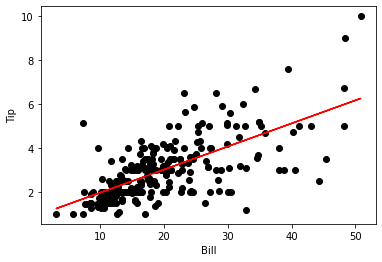

The coefficient b1 is positive, equal to 0.9203, and significant with a p-value almost equal to zero, so we can refuse H0:b1=0 with any level of significance. A coefficient b1 equal to 0.1050 is interpreted as the increase of y caused by an increase of 1 of the value x, so the model says a 1 euro increase in the bill cause a 10 cents increase of the tip.
An R2 equal to 0.457 means technically that 45.7% of the variance in the outcome variable is explained by the model, this value is quite small so data does not fit very well the model.


In [67]:
#OLS model: y=tips ; x=total_bill

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


Y = df["tip"]
X = df[["total_bill"]]
data = {"x" : X, "y" : Y}

model = smf.ols('y ~ x', data=data).fit()

print(model.summary())


plt.scatter(X,Y,color = "black")
plt.xlabel("Bill")
plt.ylabel("Tip")
plt.plot(X,Y_pred,color="Red")
plt.show()


print("The coefficient b1 is positive, equal to 0.9203, and significant with a p-value almost equal to zero, so we can refuse H0:b1=0 with any level of significance. A coefficient b1 equal to 0.1050 is interpreted as the increase of y caused by an increase of 1 of the value x, so the model says a 1 euro increase in the bill cause a 10 cents increase of the tip.")
print("An R2 equal to 0.457 means technically that 45.7% of the variance in the outcome variable is explained by the model, this value is quite small so data does not fit very well the model.")

**4) Adjust a new model with at least 2 independent variables. One of them should be categorical and the other one numerical. Give a meaningful interpretation of the model. Does it increase its performance against the simple regression one? How?**

I built this multivariate linear regression model with:

y=tips ; x0=Friday ; x1=Saturday ; x2=Sunday ; x3=Thurdays ; x4= size ; x5=total_bill

y = b0 + b1x0 + b2x1 + b3x2 + b4x3 + b5x4 + b6x5 + e

In [78]:
#Multivariate OLS model: y=tips ; x0=Friday ; x1=Saturday ; x2=Sunday ; x3=Thurdays ; x4= size ; x5=total_bill

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


Y = df["tip"]
X = df[["total_bill","size"]]


df.day = df.day.astype("str")
dummies = pd.get_dummies(data=df[['day']])
X = dummies.add(X,fill_value=0)


data = {"x" : X, "y" : Y}

model2 = smf.ols('y ~ x', data=data).fit()
print(model2.summary())

print(X)

print("""

y=tips ; x0=Friday ; x1=Saturday ; x2=Sunday ; x3=Thurdays ; x4= size ; x5=total_bill

y = b0 + b1x0 + b2x1 + b3x2 + b4x3 + b5x4 + b6x5 + e

The coefficient of the variable that measures the bill is still significant but it reduced its value  and now is equal
to 0.009, a coefficient b6 equal to 0.009 is interpreted as the increase of y caused by an increase of 1 euro of the
value x5=total_bill controlling for all the other predictors.
So the model says a 1 euro increase in the bill, controlling for the size and the pther variables cause a 0.9 cents increase
of the tip.

The coefficients of the days can be interpreted as follows:
in case it is friday then x0=1 while x1=0, x2=0, x3=0 and b0(the coefficient of friday) can be interpreted as the increase of
y due to the fact that it is Friday.
The coefficients of the days are all not significant with any level of significance.

The coefficient of the size of the table can be interpreted as the coefficient of the total_bill, this coefficient is 
significant with a 0.05 significance level because: p-value<alpha.
""")

print("""The adjusted R2 is equal to 0.458  so it is equal almost to the one of the univariate regression, this value is
still quite small so the additional predictors did not make data fit better the model, in fact almost all the
coefficients of the new predictors are not significant""")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     42.07
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           6.05e-31
Time:                        00:46:53   Log-Likelihood:                -347.69
No. Observations:                 244   AIC:                             707.4
Df Residuals:                     238   BIC:                             728.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5535      0.158      3.501      0.0